In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress,pearsonr
import numpy as np
import json
import requests


In [24]:
# Study data files
restaurants_df = pd.read_csv("Resources/clean_rest_data.csv")
top5_df = pd.read_csv("Resources/top_five_covid_counties.csv")
bott5_df = pd.read_csv("Resources/bottom_five_covid_counties.csv")

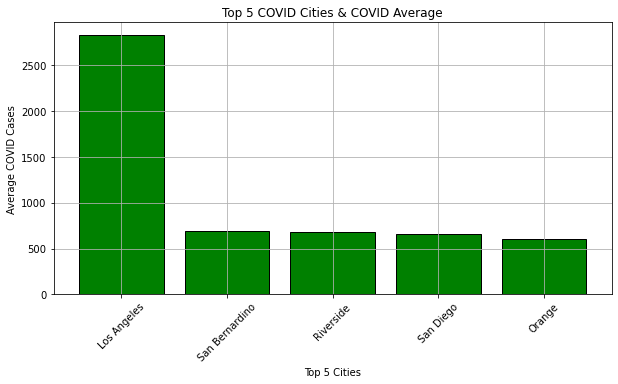

In [33]:
# Top 5 Cities and their Average COVID Cases
plt.figure(figsize = (10, 5))
plt.bar(top5_df["area"], top5_df["cases"], edgecolor='black', color = "g")
plt.title("Top 5 COVID Cities & COVID Average")
plt.xlabel("Top 5 Cities")
plt.ylabel("Average COVID Cases")
plt.xticks(rotation = 45)
plt.grid()
plt.savefig("output_data/Top_5_average_cases.png")
plt.show()

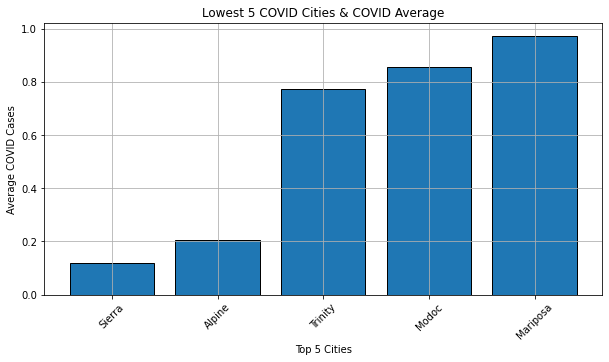

In [34]:
# Top 5 Cities and their Average COVID Cases
plt.figure(figsize = (10, 5))
plt.bar(bott5_df["area"], bott5_df["cases"], edgecolor='black')
plt.title("Lowest 5 COVID Cities & COVID Average")
plt.xlabel("Top 5 Cities")
plt.ylabel("Average COVID Cases")
plt.xticks(rotation = 45)
plt.grid()
plt.savefig("output_data/Bottom_5_average_cases.png")
plt.show()

In [18]:
restaurants_df["County_Name"].unique()

array(['Alameda County', 'Alpine County', 'Amador County', 'Butte County',
       'Calaveras County', 'Colusa County', 'Contra Costa County',
       'Del Norte County', 'El Dorado County', 'Fresno County',
       'Glenn County', 'Humboldt County', 'Imperial County',
       'Inyo County', 'Kern County', 'Kings County', 'Lake County',
       'Lassen County', 'Los Angeles County', 'Madera County',
       'Marin County', 'Mariposa County', 'Mendocino County',
       'Merced County', 'Modoc County', 'Mono County', 'Monterey County',
       'Napa County', 'Nevada County', 'Orange County', 'Placer County',
       'Plumas County', 'Riverside County', 'Sacramento County',
       'San Benito County', 'San Bernardino County', 'San Diego County',
       'San Francisco County', 'San Joaquin County',
       'San Luis Obispo County', 'San Mateo County',
       'Santa Barbara County', 'Santa Clara County', 'Santa Cruz County',
       'Shasta County', 'Sierra County', 'Siskiyou County',
       'Solano 

In [19]:
top5_df.head()

,area,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,Los Angeles,10257557.0,2827.767221,56.520190,42318.993318,3408.314031,2646.600000,52.886667,64130.890449
1,San Bernardino,2217398.0,689.532067,10.729216,6280.982183,762.178174,645.237778,10.157778,7080.688202
2,Riverside,2468145.0,680.745843,10.344418,6253.768374,763.886414,637.002222,9.780000,6785.769663
3,San Diego,3370418.0,654.147268,8.769596,9154.717149,659.316258,612.026667,8.204444,11002.424157
4,Orange,3228519.0,599.669834,11.681710,8046.567929,686.118040,561.180000,10.931111,9274.530899


In [20]:
rest_LA = restaurants_df[restaurants_df["County_Name"]== "Los Angeles County"].reset_index(drop = True)
rest_LA.head(20)

,County_Name,FIPS_County,date,Business_Type,Action,order_group,order_code,Current_order_status,Effective_date,Date_Signed,Citation
0,Los Angeles County,37,3/15/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
1,Los Angeles County,37,3/16/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
2,Los Angeles County,37,3/17/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
3,Los Angeles County,37,3/18/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
4,Los Angeles County,37,3/19/2020 0:00,Restaurants,Curbside/carryout/delivery only,Curbside/delivery only,4,In effect,3/19/2020,3/19/2020,"Cal. Exec. Order No. N-33-20 (Mar. 19, 2020)"
5,Los Angeles County,37,3/20/2020 0:00,Restaurants,Curbside/carryout/delivery only,Curbside/delivery only,4,In effect,3/19/2020,3/19/2020,"Cal. Exec. Order No. N-33-20 (Mar. 19, 2020)"
6,Los Angeles County,37,3/21/2020 0:00,Restaurants,Curbside/carryout/delivery only,Curbside/delivery only,4,In effect,3/19/2020,3/19/2020,"Cal. Exec. Order No. N-33-20 (Mar. 19, 2020)"
7,Los Angeles County,37,3/22/2020 0:00,Restaurants,Curbside/carryout/delivery only,Curbside/delivery only,4,In effect,3/19/2020,3/19/2020,"Cal. Exec. Order No. N-33-20 (Mar. 19, 2020)"
8,Los Angeles County,37,3/23/2020 0:00,Restaurants,Curbside/carryout/delivery only,Curbside/delivery only,4,In effect,3/19/2020,3/19/2020,"Cal. Exec. Order No. N-33-20 (Mar. 19, 2020)"
9,Los Angeles County,37,3/24/2020 0:00,Restaurants,Curbside/carryout/delivery only,Curbside/delivery only,4,In effect,3/19/2020,3/19/2020,"Cal. Exec. Order No. N-33-20 (Mar. 19, 2020)"
